# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://code.s3.yandex.net/datasets/real_estate_data.csv", sep='\t')
data.info()
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Выполните предобработку данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

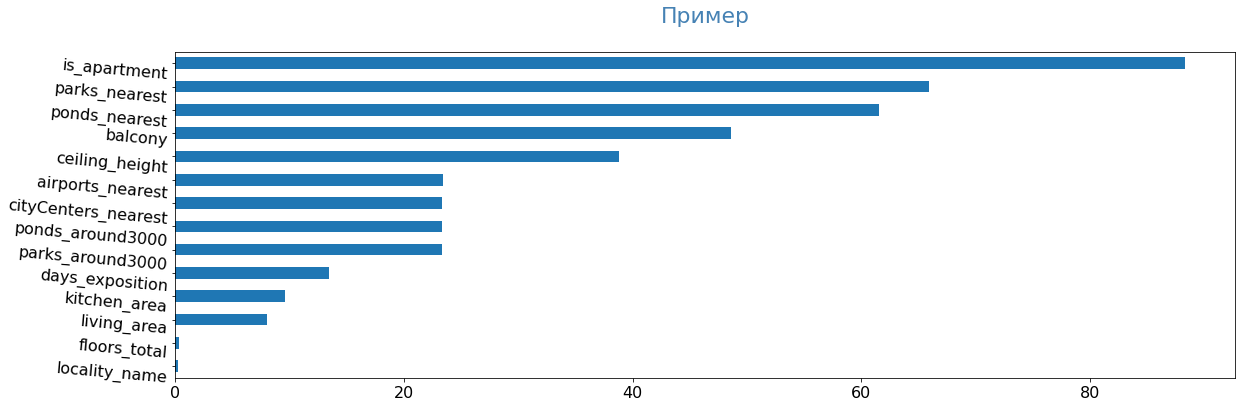

In [6]:
pass_value_barh(data)

In [7]:
for val in data[['balcony', 'parks_around3000', 'ponds_around3000']]:
    data[val] = pd.to_numeric(data[val], errors='coerce').round().fillna(0).astype('Int64')
for temp in data[['floors_total', 'last_price', 'airports_nearest', 'days_exposition']]:
    data[temp] = pd.to_numeric(data[temp], errors='coerce').round().astype('Int64')
data['locality_name'] = (data['locality_name'].str.strip().str.lower()
                         .str.replace('ё', 'е', regex=True)
                         .str.replace('городской поселок', 'поселок', regex=True)
                         .str.replace('поселок городского типа', 'поселок', regex=True)
                         .str.replace('поселок', 'село', regex=True)
                         .str.replace('ж/д_станция', 'жд станция', regex=True)
                         .str.replace('ж/д станция', 'жд станция', regex=True)
                         .str.replace('садоводство', 'садовое товарищество', regex=True))

Итак, данные в столбцах: balcony, parks_around, ponds_around, были изменены тип данных(с float64 на int64) и пустые значения заполнены значеним 0. Тип данных изменён с вещественного на целочисленный, по причине того что все эти параметры могут исчисляться только в целом виде(кол-во балконов, кол-во парков в округе, кол-во водоёмов в округе)
Данные в столбцах: floors_total, last_price, days_exposition, airports_nearest, были изменены тип данных(с float64 на int64). Тип данных был измененён по той же причине, что и ранее, параметры исчисляются только в целом виде(кол-во этажей, цена, кол-во аэропотров, кол-во дней на доске объявлений).
```
Были пропущены значения в таких столбца как:
Столбец                 Кол-во пропусков
ceiling_height           9195
floors_total               86
living_area              1903
is_apartment            20924
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
```
Причинами пропусков в данных могут быть: Продавец не указал пункт(балконы, парки в округи, водоёмы в округе), по причине их отсутствия, данные могли быть просто утеряны, также, значение может быть неприменимо к определённому объекту(в частном доме не может быть этаж в многоэтажке, также пропуски могли возникнуть при сборе данных.
Также таблица была отчищена от неявных дубликатов, все слова были приведены к нижнему регистру, все лишние пробелы удалены, все буквы ё были заменены на е, синонимы слова село на село, ж/д стенция и ж/д_станция на жд станция, а садоводство на садовое товарищество.

In [8]:
# check
data.locality_name.nunique()

321

### Добавьте в таблицу новые столбцы

In [9]:
def type_floor(row):
    if pd.isna(row['floor']) or pd.isna(row['floors_total']):
        return 'неизвестно'
    if row['floor']<=0 or row['floors_total']<=0:
        return 'неизвестно'
    elif row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [10]:
data['price_per_m'] = (data['last_price'].astype(float)/data['total_area'].astype(float)).round(2)# Вычисление цены квадратного метра
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['first_exposition_weekday'] = data['first_day_exposition'].dt.weekday #День недели размещения объявления
data['first_exposition_month'] = data['first_day_exposition'].dt.month #Месяц размещения обявления
data['first_exposition_year'] = data['first_day_exposition'].dt.year #год размещения объявления
data['floor_type'] = data.apply(type_floor, axis=1)
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'].astype(float)/1000).round().astype('Int64')
data['floor_type'].value_counts()

другой        17363
последний      3336
первый         2914
неизвестно       86
Name: floor_type, dtype: int64

Дата публикации объявления была разбита на 3 столбца: день недели публикации, месяц публикации и год публикации.
Был добавлен новый столбец price_per_m, в котором отображается цена одного квадратного метра для каждого объекта.
Добавлен столбец type_floor, в котором показан тип этажа(первый, последний, другой и неизвестно-при отсутствии сведений об общем кол-ве этажей или этаже самого объекта)
Также еденица измерения в столбце cityCenters_nearest, была изменена с метров на километры и округлена к целому числу, также был изменен типа данных с float на int64.

### Проведите исследовательский анализ данных

# 4.1

In [14]:
df_clean = data.copy()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23699 non-null  int64         
 1   last_price                23699 non-null  Int64         
 2   total_area                23699 non-null  float64       
 3   first_day_exposition      23699 non-null  datetime64[ns]
 4   rooms                     23699 non-null  int64         
 5   ceiling_height            14504 non-null  float64       
 6   floors_total              23613 non-null  Int64         
 7   living_area               21796 non-null  float64       
 8   floor                     23699 non-null  int64         
 9   is_apartment              2775 non-null   object        
 10  studio                    23699 non-null  bool          
 11  open_plan                 23699 non-null  bool          
 12  kitchen_area      

In [16]:
def fix_ceiling(x):
    if x > 20 and x < 40:
        return x / 10
    return x

In [17]:
# Общая площадь
df_clean = df_clean[(df_clean['total_area'] >= 10) & (df_clean['total_area'] <= 400)].copy()

# Жилая площадь
mask_living = (df_clean['living_area'] >= 5) & (df_clean['living_area'] <= df_clean['total_area'])
df_clean = df_clean[mask_living | df_clean['living_area'].isna()].copy()

# Площадь кухни
mask_kitchen = (df_clean['kitchen_area'] >= 2) & (df_clean['kitchen_area'] <= 50)
df_clean = df_clean[mask_kitchen | df_clean['kitchen_area'].isna()].copy()

# Цена
df_clean = df_clean[(df_clean['last_price'] >= 1e5) & (df_clean['last_price'] <= 1e8)].copy()

# Количество комнат
mask_rooms = (df_clean['rooms'] >= 0) & (df_clean['rooms'] <= 10)
df_clean = df_clean[mask_rooms | df_clean['rooms'].isna()].copy()

# Потолки
df_clean['ceiling_height'] = df_clean['ceiling_height'].apply(fix_ceiling)
mask_ceiling = (df_clean['ceiling_height'] >= 2.3) & (df_clean['ceiling_height'] <= 4)
df_clean = df_clean[mask_ceiling | df_clean['ceiling_height'].isna()].copy()

# Этажность дома
mask_floors = (df_clean['floors_total'] >= 1) & (df_clean['floors_total'] <= 50)
df_clean = df_clean[mask_floors | df_clean['floors_total'].isna()].copy()

# Расстояние до центра
mask_center = df_clean['cityCenters_nearest'] <= 50000
df_clean = df_clean[mask_center | df_clean['cityCenters_nearest'].isna()].copy()

# Расстояние до парка
mask_park = df_clean['parks_nearest'] <= 5000
df_clean = df_clean[mask_park | df_clean['parks_nearest'].isna()].copy()

# Признак типа этажа
df_clean['floor_type'] = df_clean.apply(type_floor, axis=1)

### Общая площадь (кв.м.)

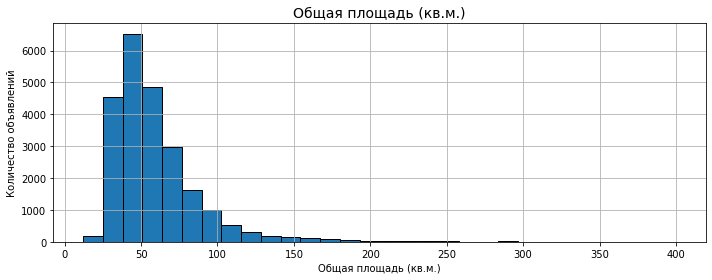

In [20]:
plt.figure(figsize=(10, 4))
plt.hist(df_clean['total_area'], bins=30, edgecolor='black')
plt.title("Общая площадь (кв.м.)", fontsize=14)
plt.xlabel("Общая площадь (кв.м.)")
plt.ylabel("Количество объявлений")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Большинство квартир имеют площадь от 30 до 60 кв.м. Это наиболее типичный размер квартир.

### Жилая площадь (кв.м.)

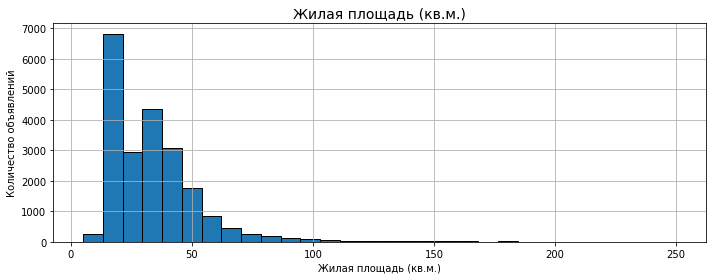

In [21]:
plt.figure(figsize=(10, 4))
plt.hist(df_clean['living_area'], bins=30, edgecolor='black')
plt.title("Жилая площадь (кв.м.)", fontsize=14)
plt.xlabel("Жилая площадь (кв.м.)")
plt.ylabel("Количество объявлений")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Жилая площадь чаще всего составляет от 15 до 40 кв.м., что логично для 1–2-комнатных квартир.

### Площадь кухни (кв.м.)

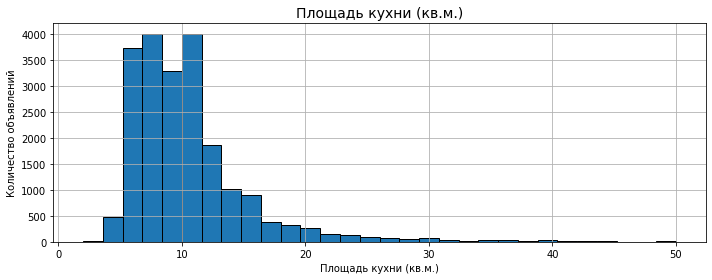

In [22]:
plt.figure(figsize=(10, 4))
plt.hist(df_clean['kitchen_area'], bins=30, edgecolor='black')
plt.title("Площадь кухни (кв.м.)", fontsize=14)
plt.xlabel("Площадь кухни (кв.м.)")
plt.ylabel("Количество объявлений")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Наиболее популярные значения находятся в пределах 6–12 кв.м.

### Цена объекта

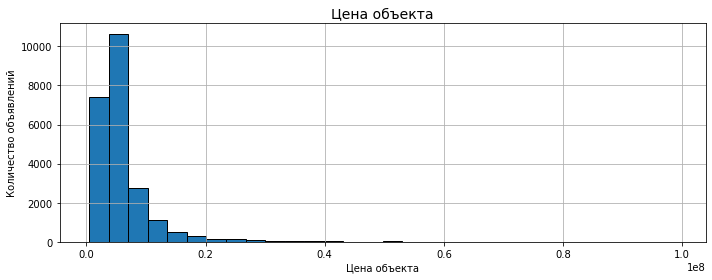

In [23]:
plt.figure(figsize=(10, 4))
plt.hist(df_clean['last_price'], bins=30, edgecolor='black')
plt.title("Цена объекта", fontsize=14)
plt.xlabel("Цена объекта")
plt.ylabel("Количество объявлений")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Большинство объектов стоят до 10 млн рублей. Это основная масса рынка.

### Количество комнат

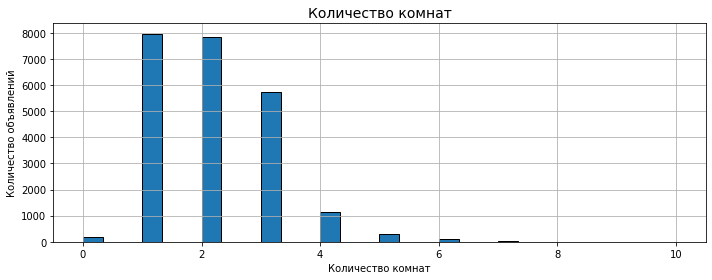

In [24]:
plt.figure(figsize=(10, 4))
plt.hist(df_clean['rooms'], bins=30, edgecolor='black')
plt.title("Количество комнат", fontsize=14)
plt.xlabel("Количество комнат")
plt.ylabel("Количество объявлений")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Лидируют 1, 2 и 3-комнатные квартиры — стандартная структура по рынку.

### Высота потолков (м)

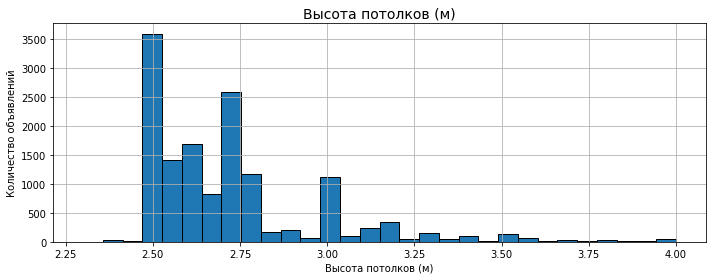

In [25]:
plt.figure(figsize=(10, 4))
plt.hist(df_clean['ceiling_height'], bins=30, edgecolor='black')
plt.title("Высота потолков (м)", fontsize=14)
plt.xlabel("Высота потолков (м)")
plt.ylabel("Количество объявлений")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Чаще всего высота потолков — от 2.5 до 2.8 метров. Есть редкие квартиры с потолками выше 3 метров.

### Этажность дома

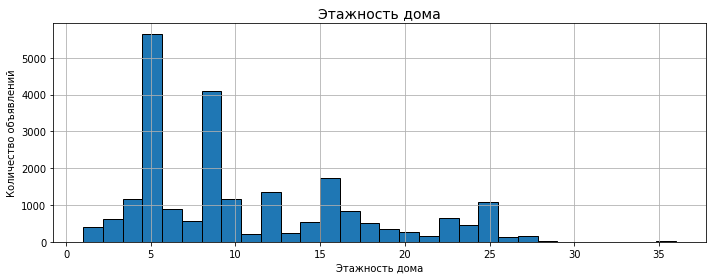

In [26]:
plt.figure(figsize=(10, 4))
plt.hist(df_clean['floors_total'].dropna(), bins=30, edgecolor='black')
plt.title("Этажность дома", fontsize=14)
plt.xlabel("Этажность дома")
plt.ylabel("Количество объявлений")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Чаще всего дома имеют от 5 до 25 этажей. Пик около 9 этажей.

### Расстояние до центра (м)

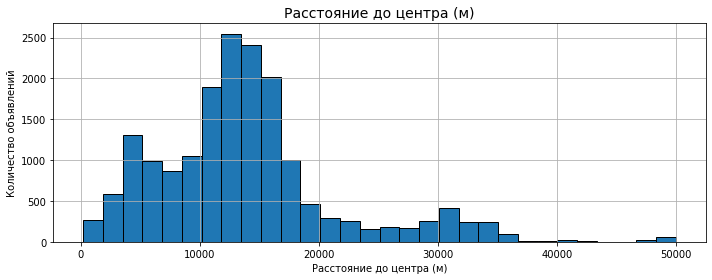

In [27]:
plt.figure(figsize=(10, 4))
plt.hist(df_clean['cityCenters_nearest'], bins=30, edgecolor='black')
plt.title("Расстояние до центра (м)", fontsize=14)
plt.xlabel("Расстояние до центра (м)")
plt.ylabel("Количество объявлений")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Большая часть квартир находится в пределах 10–15 км от центра.

### Расстояние до парка (м)

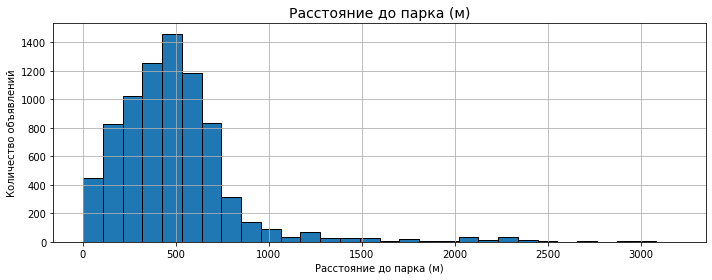

In [28]:
plt.figure(figsize=(10, 4))
plt.hist(df_clean['parks_nearest'], bins=30, edgecolor='black')
plt.title("Расстояние до парка (м)", fontsize=14)
plt.xlabel("Расстояние до парка (м)")
plt.ylabel("Количество объявлений")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Много квартир расположены вблизи зелёных зон — до 500 метров от парка. Однако следует учитывать, что у значительной части данных в этом столбце отсутствуют значения, поэтому вывод может не отражать общую картину.

### Тип этажа квартиры

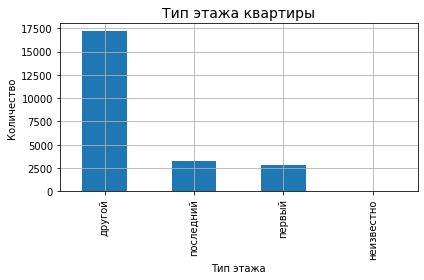

In [29]:
df_clean['floor_type'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.title("Тип этажа квартиры", fontsize=14)
plt.xlabel("Тип этажа")
plt.ylabel("Количество")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Большинство квартир находятся не на первом и не на последнем этажах, что обычно более предпочтительно для покупателей.

Медиана: 95.0
Среднее: 180.88863436982163


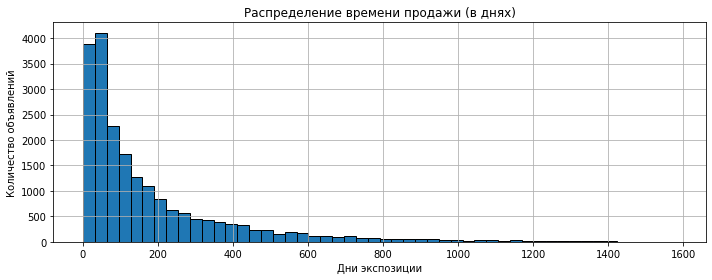

In [41]:
print("Медиана:", data['days_exposition'].median())
print("Среднее:", data['days_exposition'].mean())

plt.figure(figsize=(10, 4))
plt.hist(data['days_exposition'].dropna(), bins=50, edgecolor='black')
plt.title("Распределение времени продажи (в днях)")
plt.xlabel("Дни экспозиции")
plt.ylabel("Количество объявлений")
plt.grid(True)
plt.tight_layout()
plt.show()

**Вывод:** большинство объектов продаются примерно за 90–100 дней. Распределение асимметрично — встречаются очень долгие продажи.

### Зависимость от: Общая площадь

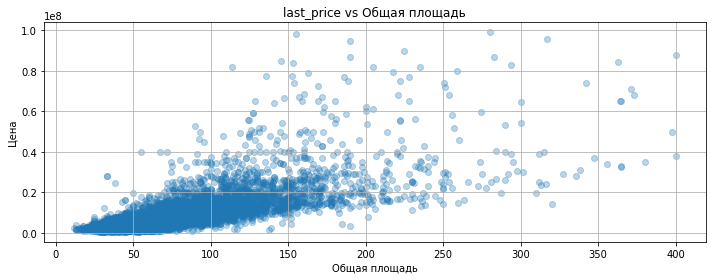

In [42]:
filtered = df_clean[["total_area", "last_price"]].dropna()
plt.figure(figsize=(10, 4))
plt.scatter(filtered['total_area'], filtered['last_price'], alpha=0.3)
plt.title("last_price vs Общая площадь")
plt.xlabel("Общая площадь")
plt.ylabel("Цена")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** На графике наблюдается положительная зависимость между общей площадью и ценой квартиры. До 150 м² рост цены выглядит логично, далее — появляются выбросы. Это может указывать на элитные объекты или ошибки в данных.

### Зависимость от: Жилая площадь

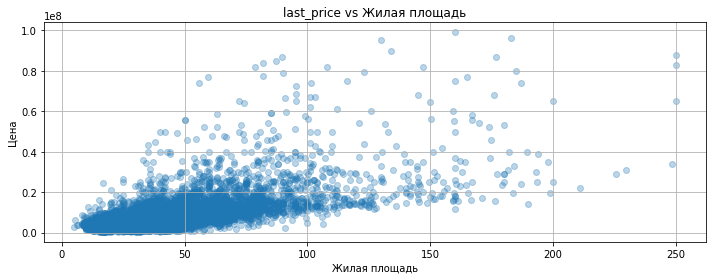

In [43]:
filtered = df_clean[["living_area", "last_price"]].dropna()
plt.figure(figsize=(10, 4))
plt.scatter(filtered['living_area'], filtered['last_price'], alpha=0.3)
plt.title("last_price vs Жилая площадь")
plt.xlabel("Жилая площадь")
plt.ylabel("Цена")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** График показывает положительную зависимость между жилой площадью и ценой, особенно до 100 м². После этого значения становятся более разбросанными, появляются выбросы. Это снижает предсказуемость цены по жилой площади в больших объектах.

### Зависимость от: Площадь кухни

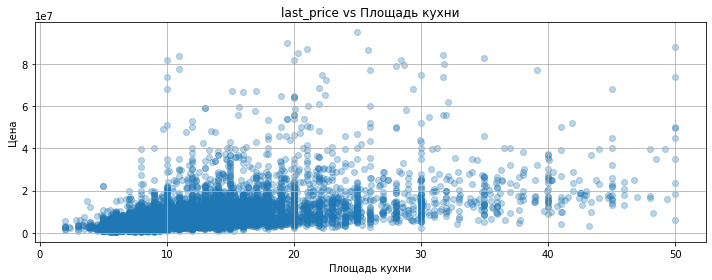

In [44]:
filtered = df_clean[["kitchen_area", "last_price"]].dropna()
plt.figure(figsize=(10, 4))
plt.scatter(filtered['kitchen_area'], filtered['last_price'], alpha=0.3)
plt.title("last_price vs Площадь кухни")
plt.xlabel("Площадь кухни")
plt.ylabel("Цена")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Связь между ценой и площадью кухни слабая. Основная масса квартир сосредоточена в диапазоне 7–15 м², дальше наблюдаются выбросы. Большие кухни не всегда означают высокую цену.

### Зависимость от: Количество комнат

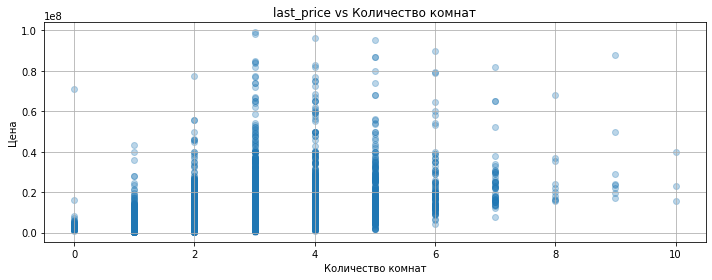

In [45]:
filtered = df_clean[["rooms", "last_price"]].dropna()
plt.figure(figsize=(10, 4))
plt.scatter(filtered['rooms'], filtered['last_price'], alpha=0.3)
plt.title("last_price vs Количество комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Цена")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Чаще всего встречаются квартиры с 1–3 комнатами, и их цена постепенно растёт с увеличением числа комнат. При этом для 4 комнат и выше наблюдается больше выбросов по цене. Связь ослабевает после 5 комнат.

### Зависимость от: Этаж

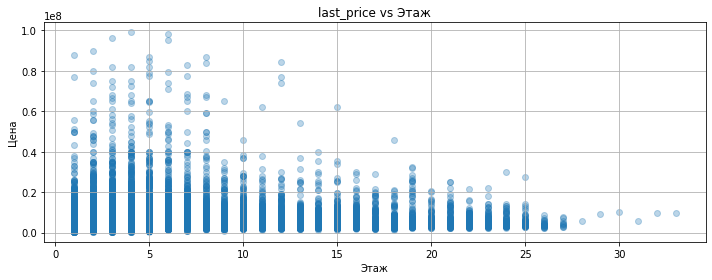

In [46]:
filtered = df_clean[["floor", "last_price"]].dropna()
plt.figure(figsize=(10, 4))
plt.scatter(filtered['floor'], filtered['last_price'], alpha=0.3)
plt.title("last_price vs Этаж")
plt.xlabel("Этаж")
plt.ylabel("Цена")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Цены наиболее разнообразны на этажах до 10 — там наблюдаются как бюджетные, так и дорогие квартиры. Начиная с 15 этажа, разброс цен уменьшается. Высокие этажи встречаются реже и чаще относятся к типовым домам с умеренной стоимостью.

### Зависимость от: День недели публикации

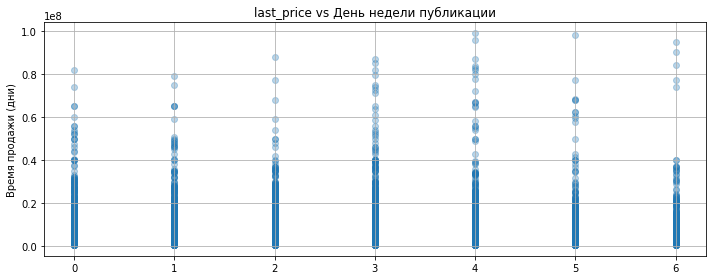

In [47]:
filtered = df_clean[["first_exposition_weekday", "last_price"]].dropna()
plt.figure(figsize=(10, 4))
plt.scatter(filtered['first_exposition_weekday'], filtered['last_price'], alpha=0.3)
plt.title("last_price vs День недели публикации")
plt.ylabel("Цена")
plt.ylabel("Время продажи (дни)")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Связи между днём недели публикации и ценой не наблюдается. Распределение по всем дням примерно одинаковое, выбросы присутствуют в каждом дне. День публикации не влияет на стоимость квартиры.

### Зависимость от: Месяц публикации

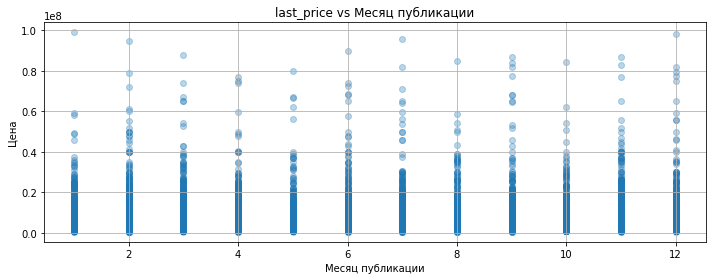

In [48]:
filtered = df_clean[["first_exposition_month", "last_price"]].dropna()
plt.figure(figsize=(10, 4))
plt.scatter(filtered['first_exposition_month'], filtered['last_price'], alpha=0.3)
plt.title("last_price vs Месяц публикации")
plt.xlabel("Месяц публикации")
plt.ylabel("Цена")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Зависимость между месяцем публикации и ценой не прослеживается. Распределение цен остаётся стабильным в течение года. Сезонного влияния на стоимость выявлено не было.

### Зависимость от: Год публикации

In [49]:
# Преобразуем в обычные типы
# grouped['first_exposition_year'] = grouped['first_exposition_year'].astype(int)
# grouped['avg_price'] = grouped['avg_price'].astype(float)
# grouped['avg_area'] = grouped['avg_area'].astype(float)
# grouped['num_ads'] = grouped['num_ads'].astype(int)

grouped = (
    df_clean
    .groupby('first_exposition_year', dropna=True)
    .agg(
        avg_price=('last_price', 'mean'),
        avg_area=('total_area', 'mean'),
        num_ads=('last_price', 'count')
    )
    .reset_index()
)

# Явное преобразование типов для matplotlib
grouped['first_exposition_year'] = grouped['first_exposition_year'].astype(int)
grouped['avg_price'] = grouped['avg_price'].astype(float)
grouped['avg_area'] = grouped['avg_area'].astype(float)
grouped['num_ads'] = grouped['num_ads'].astype(int)

In [50]:
# Построение графиков
plt.figure(figsize=(15, 5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

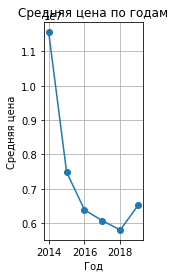

In [51]:
# Средняя цена
plt.subplot(1, 3, 1)
plt.plot(grouped['first_exposition_year'], grouped['avg_price'], marker='o')
plt.title('Средняя цена по годам')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.grid(True)

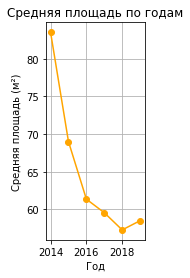

In [52]:
# Средняя площадь
plt.subplot(1, 3, 2)
plt.plot(grouped['first_exposition_year'], grouped['avg_area'], marker='o', color='orange')
plt.title('Средняя площадь по годам')
plt.xlabel('Год')
plt.ylabel('Средняя площадь (м²)')
plt.grid(True)

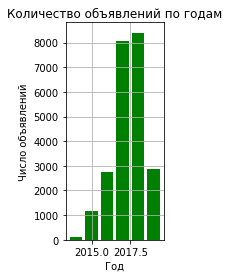

In [53]:
# Кол-во объявлений
plt.subplot(1, 3, 3)
plt.bar(grouped['first_exposition_year'], grouped['num_ads'], color='green')
plt.title('Количество объявлений по годам')
plt.xlabel('Год')
plt.ylabel('Число объявлений')
plt.grid(True)

In [54]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

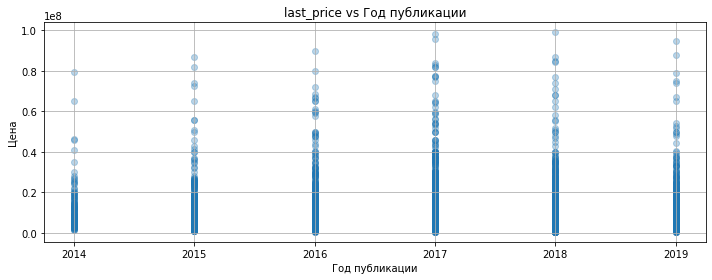

In [55]:
filtered = df_clean[["first_exposition_year", "last_price"]].dropna()
plt.figure(figsize=(10, 4))
plt.scatter(filtered['first_exposition_year'], filtered['last_price'], alpha=0.3)
plt.title("last_price vs Год публикации")
plt.xlabel("Год публикации")
plt.ylabel("Цена")
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Средняя цена на квартиры по годам демонстрирует снижение, особенно заметное в период с 2014 по 2016 год. Однако на это изменение повлияли и другие факторы. В частности, вместе с ценой уменьшалась и средняя площадь продаваемых объектов, что могло влиять на общую динамику стоимости. Кроме того, начиная с 2016 года резко увеличилось количество объявлений, что также могло сказаться на средней цене. Таким образом, снижение цен нельзя однозначно интерпретировать как удешевление недвижимости — оно может быть связано со структурой предложений, в которых стало больше компактных и, соответственно, более дешёвых квартир.

In [56]:
count_10 = data['locality_name'].value_counts().head(10).index
count = data[data['locality_name'].isin(count_10)]
top_per_m = (count.groupby('locality_name')['price_per_m'].mean().sort_values(ascending=False))
top_per_m

locality_name
санкт-петербург    114849.008793
пушкин             103125.819377
деревня кудрово     92473.547559
село парголово      90175.913089
село мурино         85681.762572
село шушары         78677.364318
колпино             75424.579112
гатчина             68746.146515
всеволожск          68654.473970
выборг              58141.909325
Name: price_per_m, dtype: float64

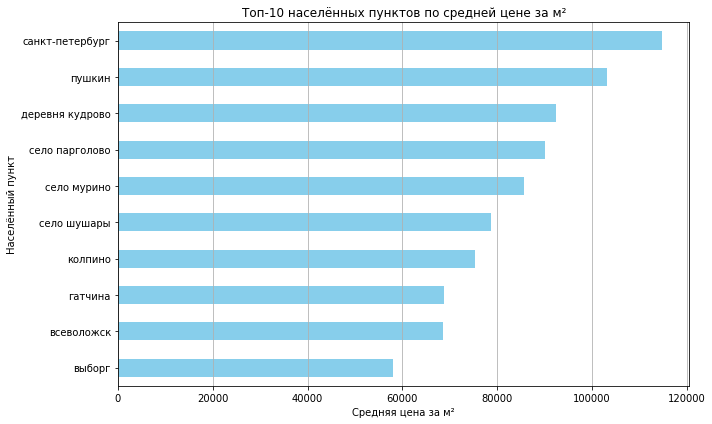

In [57]:
top_per_m.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Топ-10 населённых пунктов по средней цене за м²')
plt.xlabel('Средняя цена за м²')
plt.ylabel('Населённый пункт')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

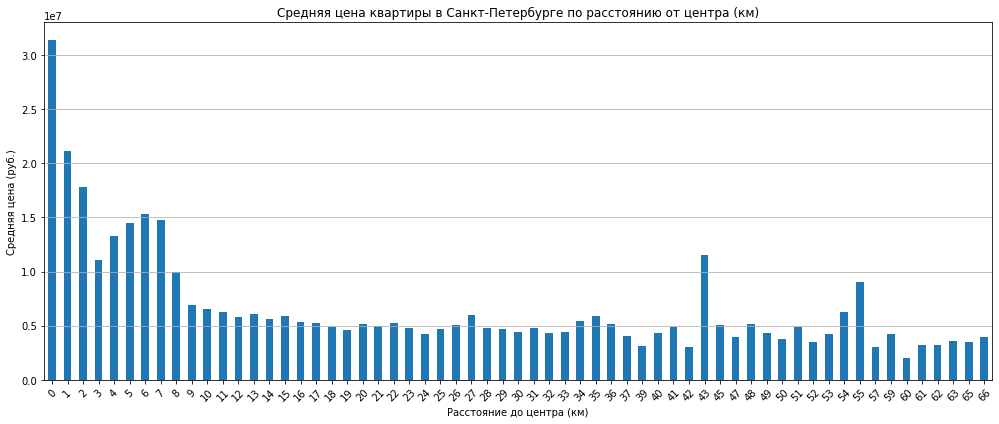

city_center_km
0     31449115.85
1     21206720.83
2     17788319.61
3     11126581.00
4     13304279.53
5     14499121.06
6     15338418.39
7     14775152.59
8      9957716.83
9      6950658.58
10     6504119.23
11     6250814.96
12     5828544.72
13     6083140.87
14     5629101.25
15     5884751.39
16     5373130.56
17     5292394.63
18     5091331.32
19     5037674.94
20     5951464.84
21     5493469.37
22     5415524.28
23     4985376.47
24     3854429.62
25     4052839.92
26     3973012.51
27     8300000.00
28     5026428.57
29     4236666.67
Name: last_price, dtype: float64

In [58]:
spb_data = data[data['locality_name'] == 'санкт-петербург']
spb_data = spb_data[spb_data['cityCenters_nearest'].notna()]
spb_data['city_center_km'] = (spb_data['cityCenters_nearest'] / 1000).round().astype('Int64')
price_by_km = spb_data.groupby('city_center_km')['last_price'].mean()
price_by_km = price_by_km.astype(float).round(2)
price_by_km = price_by_km.sort_index()
distance_price = data.groupby('cityCenters_nearest_km')['last_price'].mean()

# Визуализация
distance_price.plot(kind='bar', figsize=(14, 6))
plt.title('Средняя цена квартиры в Санкт-Петербурге по расстоянию от центра (км)')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена (руб.)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
price_by_km

In [59]:
data_27km = data[
    (data['locality_name'] == 'санкт-петербург') &
    (data['cityCenters_nearest'].notna())
].copy()

data_27km['cityCenters_nearest_km'] = (data_27km['cityCenters_nearest'] / 1000).round()
data_27km = data_27km[data_27km['cityCenters_nearest_km'] == 27]

display(data_27km[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].sort_values(by='last_price', ascending=False))

,last_price,total_area,rooms,cityCenters_nearest
748,14350000,74.0,2,27313.0
5961,2250000,32.0,1,27431.0


**Вывод**: Выброс на 27-м километре от центра Санкт-Петербурга объясняется всего двумя записями. Одна из квартир имеет очень высокую цену — 14 350 000 рублей при площади 74 м, что существенно выше средних значений на этом расстоянии. Это искажение может быть связано с элитной недвижимостью за городом, ошибкой в расчёте расстояния до центра или некорректными координатами. Поскольку таких записей крайне мало и они значительно влияют на средние значения, их следует рассматривать как локальные выбросы

In [60]:
df_clean['cityCenters_nearest_km'] = (df_clean['cityCenters_nearest'] / 1000).round()

floor_km_counts = df_clean.pivot_table(
    index=['cityCenters_nearest_km', 'floor_type'],
    values='last_price',
    aggfunc='count'
).reset_index().rename(columns={'last_price': 'count'})

target_km = [3, 5]

floor_stats = floor_km_counts[
    floor_km_counts['cityCenters_nearest_km'].isin(target_km)
].copy()

total_by_km = floor_stats.groupby('cityCenters_nearest_km')['count'].transform('sum')

floor_stats['share'] = floor_stats['count'] / total_by_km

floor_stats = floor_stats.sort_values(by=['cityCenters_nearest_km', 'floor_type'])

display(floor_stats)

,cityCenters_nearest_km,floor_type,count,share
9,3.0,другой,211,0.608069
10,3.0,неизвестно,2,0.005764
11,3.0,первый,56,0.161383
12,3.0,последний,78,0.224784
16,5.0,другой,676,0.751111
17,5.0,неизвестно,5,0.005556
18,5.0,первый,82,0.091111
19,5.0,последний,137,0.152222


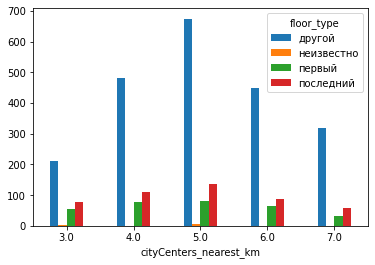

In [61]:
# способы представления информации, иногда можно использовать графики чтобы посмотреть на доли
(
    df_clean
     .query('locality_name == "санкт-петербург"')
     .query('3 <= cityCenters_nearest_km <=7 ')
     .pivot_table(index='cityCenters_nearest_km', columns='floor_type', values='last_price', aggfunc='count')
).plot.bar(rot=0);

**Вывод**:На 3-м и 5-м километре от центра Санкт-Петербурга преобладают квартиры, расположенные не на первом и не на последнем этажах. При этом доля первых и последних этажей на этих километрах составляет от 10% до 30% в зависимости от конкретного участка. Это может быть связано с особенностями жилой застройки, где многоквартирные дома с промежуточными этажами чаще встречаются вблизи центра, а первый и последний этажи занимают меньшую долю. Эти особенности структуры этажности позволяют объяснить локальные пики и провалы в ценах и спросе на конкретных километрах

Пойдем по порядку:
```
-total_area(общая площадь) - Исходя из графика видно, что основная масса квартир с площадь от 20 до 80 кв. метров, большего всего квартир с площадью около 50 кв метров, их на графике 1500.Значения для этого графика взяты в диапозоне от 20 до 200 кв метров, остальные значения признаны выбросами
-livining_area(жилая площадь) - Значения взяты в диапозоне о 10 до 150 кв метров, также отброшены логически неверные значения(когда жилая площадь больше общей). Больше всего квартир с жилой площадью примерно 30 кв метров. Большенство квартир находятся в области от 15 до 50 кв метров.
-kitchen_area(площадь кухни) - Значения взяты в диапозоне от 5 до 50 кв метров, большенство значений располагаются от 7 до 15 кв метров, пик наблюдается в значениях от 7 до 10
-last_price(цена) - Значения взяты от 1 до 100 млн, основная масса объектов находится в диапозоне до 10 млн.
-rooms(кол-во комнат) - Значения взяты от 1 до 6, чаще всего встречаются квартиры с 1-3 комнатами, 4-6 комнат-небольшой хвост на графике
ceiling_height(высота потолков) - Основная масса находится в диапозоне от 2.3-3 метра, всё что больше показывает результаты значительно меньше
floors_total(кол-во этажей в доме) -  основная масса находится в диапозоне от 5 до 20 этажей, больше всего 5-тиэтажных домов, дома выше 20-ти этажей представляют довольно маленькие значения.
cityCenters_nearest(метров до центра) - чаще всего дома располагаются в 5-15 км от центра, с пиком значени в 15км, всё что ближе/дальше представляют значения гораздо ниже.
parks_nearest(метров до парка) - чаще всего парки располагаются до 800-а метров от домов, есть небольшое кол-во со значениями от 1.5 до 3 км.
```
Теперь про длительность продаж. Чаще всего квартиры продаются до 100 дней, реже до 200-450 дней, далее на графике тянится длинный хвост уходя в значения за 1500 дней. Среднее равно примерно 198 дням, но оно может быть сильно искажено из-за высоких значений в левой части графика. Медианное значение больше похоже на правду, потому что как раз примерно в этой области(111-медиана) наблюдается пик графика. Продажи ниже меедианы можно назвать быстрыми, а выше-долгими.
Теперь про зависимость от разных факторов. Если брать зависимость дней продажи от общей площади, можно заметить, что прямой зависимости нет, большенство квартир продаётся до 200 дней, основной объём продаж происходит в квартирах до 100 м, для квартир больших по площади-точек меньше, значит таких квартир меньше на рынке.
Зависимость жилой плоащади и дней продажи, как и с общей площадью прямой зависимости нет, большенство объектов имеют площадь до 80 м, а всё что больше, продается реже и имеет наибольший разброс в сведениях.
Зависимость дней продажи от площади кухни, четкой линейной зависимости как и ранее нет, основная масс объектов имеет площадь кухни до 20м, всё что выше продается редко и имеет большой разброс в днях продажи.
Зависимость комнат и дней продажи показывает, что основная масса продаж происходят в объектах с 1-4 комнатами, для квартир с 5-6 комнатами продаж значительно меньше, но разброс по сведениям о днях продажи, велик. Можно также заметить что наиболее покупаемый диапозон, это объекты с 1-3 комнатами.
Если смотреть на зависимость дней продажи и этажа, на котором располагается объект, то можно найти некую зависимость, чаще всего продаются объекты, которые находятся до 7 этажа, начиная с 10 этажа график начинает показывать снижение кол-ва продаж, но и время продажи квартиры тоже понижается с каждым этажом, скорее это связано с маленьким кол-вом предложений на высоких этажах, которые довольно быстро покупаются.
Зависимости от дня недели, в который выложили объявления напрямую, нет, однако можно заметить, что больший объём объектов был выставлен во вторник или четверг, реже всего выставляют объекты на продажу по выходным. В целом объём объявлений распределён равномерно по всем дням недели.
Зависимости между месяцем выставления и сроком продажи, нет, в течении всё года, для каждого месяца равномерно распределеён объём продаж, это и означает, что зависимости нет.
А вот зависимость между годом выставления сроком продажи, присутствует. В 2014 году, было и мало предложений и их долго покупали, от 600 до 1500 дней, дальше  с 2015 по 2019, видно тренд, в котором с каждым годом кол-во предложений снижалось и их срок продажи тоже, дойдя в 2019 году до отмеик не более 100 дней, в предыдущие года кол-во дней продаж постепенно снижалось с максимальных значений в 2015 в 1500 дней до 1200 в 2016, далее до 850 дней в 2017, а далее до 500 дней в 2018 году, в итоге дойдя до значений в 2019 году-до максимальных 100 дней продажи.
Выделив 10 населённых пунктов с наибольшим кол-вом объявлений и посчитав среднюю цену за квадратный метр, можно заметить следующее: цена находится в диапозоне от 58000 до 115000 за квадратный метр, наименьший показатель в этой десятки у Выборги, а наибольший у Санкт-Петербурга.
Чем ближе объект к центру Санкт-Петербурга, тем выше его средняя стоимость. График показывает закономерность: цена недвижимости убывает с удалением от центра.

### Напишите общий вывод

В процессе подготовки данных была проведена масштабная очистка и преобразование. В столбцах balcony, parks_around3000, ponds_around3000 пустые значения заменены на 0, а тип данных преобразован с float64 на int64, так как эти параметры логично выражаются только целыми числами. Аналогичным образом тип данных был изменён для столбцов floors_total, last_price, days_exposition, airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest — все они также были переведены в int64 после округления.

Было обнаружено множество пропусков: более 11 500 в balcony, свыше 15 000 в parks_nearest и почти 14 600 в ponds_nearest, около 9 200 — в ceiling_height, более 5 500 — в airports_nearest, и почти 3 200 — в days_exposition. Часть из них невозможно корректно заменить, поэтому они были оставлены как сигнал отсутствующих данных. Пропуски могли возникнуть из-за ошибок сбора данных или отсутствия параметров у конкретных объектов (например, отсутствие балкона или парк далеко за пределами зоны учёта).

В столбце locality_name были устранены неявные дубликаты: приведение к нижнему регистру, удаление лишних пробелов, замена буквы "ё" на "е", стандартизация названий вроде «посёлок» и «ж/д станция». Также были добавлены новые признаки: price_per_m (цена за квадратный метр), floor_type (тип этажа: первый, последний, другой, неизвестно), а также извлечены день недели, месяц и год из даты публикации. Расстояние до центра (cityCenters_nearest) переведено из метров в километры, округлено и преобразовано в int64.

Распределения показали, что большинство квартир имеют общую площадь от 20 до 80 м², с пиком около 50 м²; жилая площадь — от 15 до 50 м²; кухня — 7–15 м²; цена — до 10 млн рублей; количество комнат — 1–3; высота потолков — от 2.3 до 3 м; расстояние до центра — от 5 до 15 км. После перехода на фильтрацию с сохранением строк с пропущенными значениями объём выборки составил 23348 записей из 23 699, что составляет примерно 99% от исходных данных. Это позволило сохранить большую часть информации, избежать искажения распределений и сделать более надёжные выводы на основе очищенного, но репрезентативного массива.

В анализе длительности продажи установлено: медианное значение составляет 111 дней, а среднее — 198 дней, что указывает на наличие длинного "хвоста" в данных. Квартиры чаще всего продаются в пределах 100–150 дней. Зависимость между площадью, количеством комнат, этажом, кухней и временем продажи оказалась слабой или отсутствующей. Однако было замечено, что квартиры до 100 м² с 1–3 комнатами преобладают и продаются быстрее. Квартиры на этажах выше 10 встречаются реже и чаще продаются быстрее — вероятно, из-за ограниченного предложения.

Зависимость между днём недели или месяцем публикации и сроком продажи отсутствует. При этом чётко прослеживается связь между годом размещения и временем экспозиции: в 2014 году квартиры продавались до 1500 дней, в 2019 — менее чем за 100 дней.

При выделении 10 населённых пунктов с наибольшим количеством объявлений было выявлено, что цена за квадратный метр варьируется от 58 000 до 115 000 ₽. Максимальное значение — у Санкт-Петербурга, минимальное — у Выборга. Также наблюдается чёткая зависимость между расстоянием от центра Санкт-Петербурга и средней ценой квартиры: от 31 млн на нулевом километре до менее 5 млн на расстоянии 20 км и дальше. Это подтверждает, что местоположение остаётся ключевым фактором в формировании цены на недвижимость.

Дополнительно было проанализировано распределение квартир по типу этажа в зависимости от расстояния до центра. Результаты показали, что в пределах 3–5 км преобладают квартиры на промежуточных этажах, тогда как на больших расстояниях возрастает доля первых и последних этажей. Это подтверждает архитектурные особенности застройки: в центре чаще многоквартирные дома с несколькими этажами, в отдалённых районах — малоэтажные здания. Такие закономерности могут объяснять наблюдаемые пики и провалы в распределении цен и количества объявлений по удалённости от центра. Эти выводы усиливают понимание структуры рынка и позволяют точнее интерпретировать динамику спроса и предложения.